In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
arrest = pd.read_csv('data/USArrests.csv', index_col=[0])

In [4]:
arrest.describe(include='all')

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
arrest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
np.mean(arrest)

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [7]:
np.var(arrest)

Murder        18.591056
Assault     6806.262400
UrbanPop     205.328400
Rape          85.974576
dtype: float64

In [8]:
arrest_std = StandardScaler().fit_transform(arrest)

In [9]:
pca = PCA()
pca.fit(arrest_std)
arrest_pca = pca.transform(arrest_std)

In [10]:
def biplot(score,coeff,labels=None):
    # https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

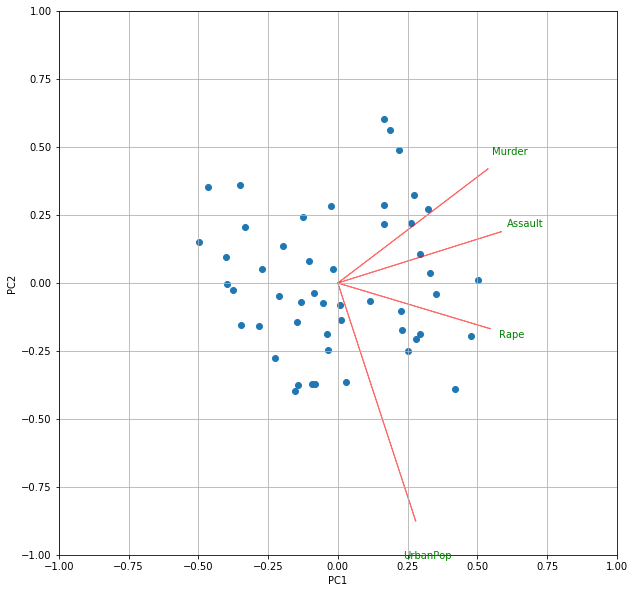

In [11]:
#Call the function. Use only the 2 PCs.
biplot(arrest_pca[:,0:2],np.transpose(pca.components_[0:2, :]), labels=arrest.columns)
plt.show()

### k means

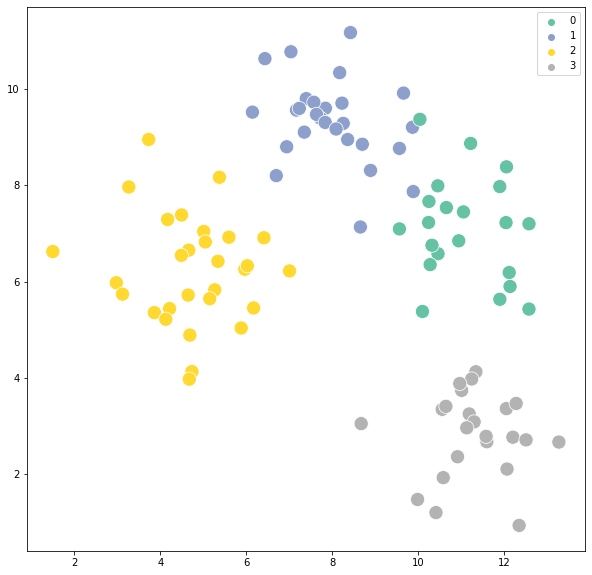

In [12]:
np.random.seed(11111)

X = np.random.normal(size=100*2).reshape(100,2)
X_mean = np.random.normal(loc=8,scale=4, size=8).reshape(4,2)
which = np.random.randint(0,4,100)
X += X_mean[which]

ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=which,  s=200, palette='Set2')

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

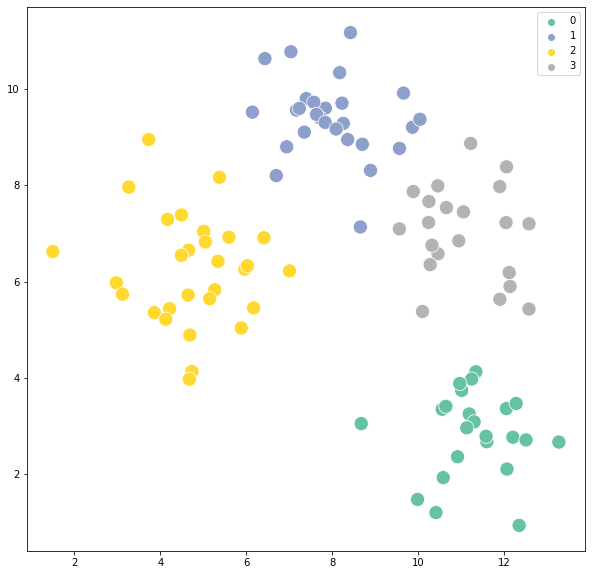

In [14]:
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans.labels_,  s=200, palette='Set2')

### hierarchical clustering

In [15]:
def plot_dendrogram(model, **kwargs):
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="ward", affinity='euclidean')
model = model.fit(X)

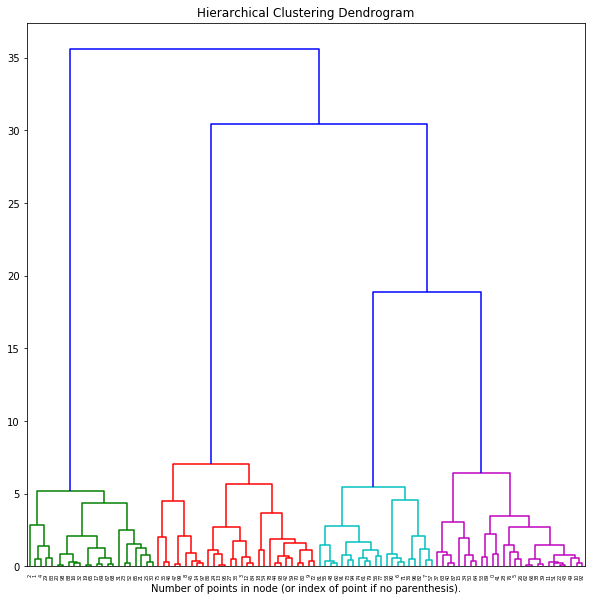

In [17]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, color_threshold=15)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

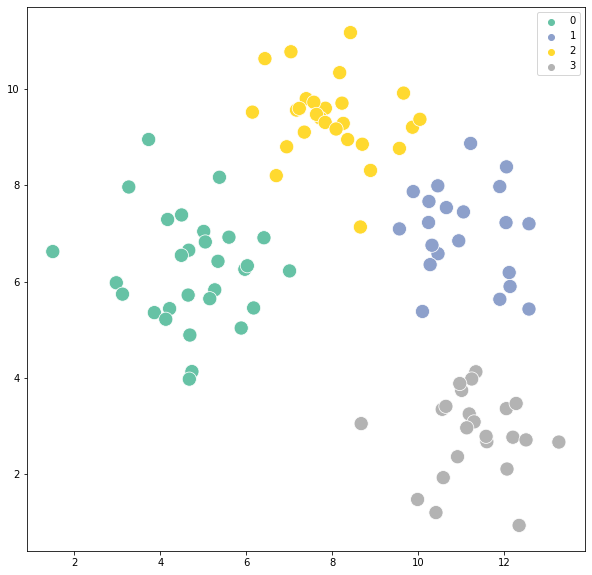

In [18]:
model = AgglomerativeClustering(n_clusters=4, linkage="ward", affinity='euclidean')
cluster = model.fit_predict(X)
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster,  s=200, palette='Set2')

In [19]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete", affinity='euclidean')
model = model.fit(X)

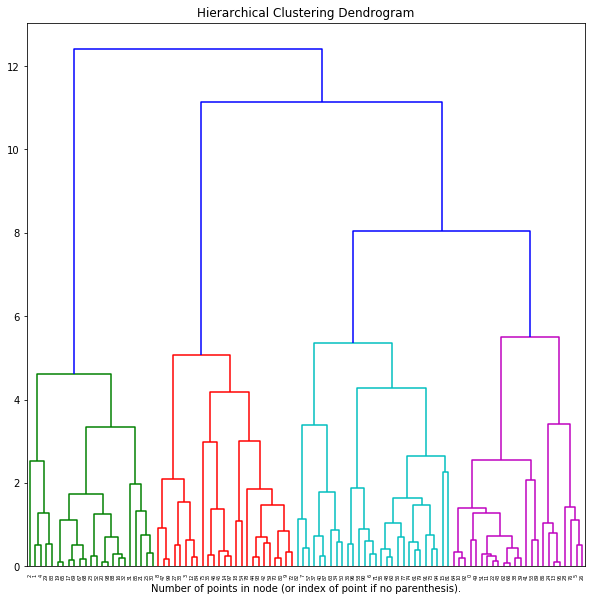

In [20]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, color_threshold=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

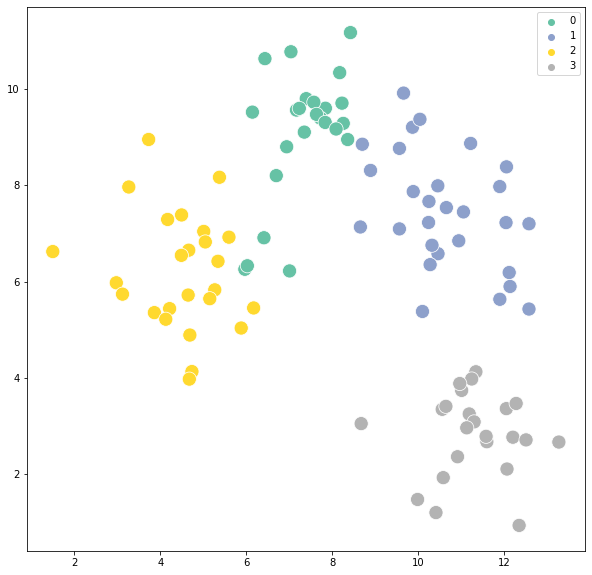

In [21]:
model = AgglomerativeClustering(n_clusters=4, linkage="complete", affinity='euclidean')
cluster = model.fit_predict(X)
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster,  s=200, palette='Set2')

In [22]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="average", affinity='euclidean')
model = model.fit(X)

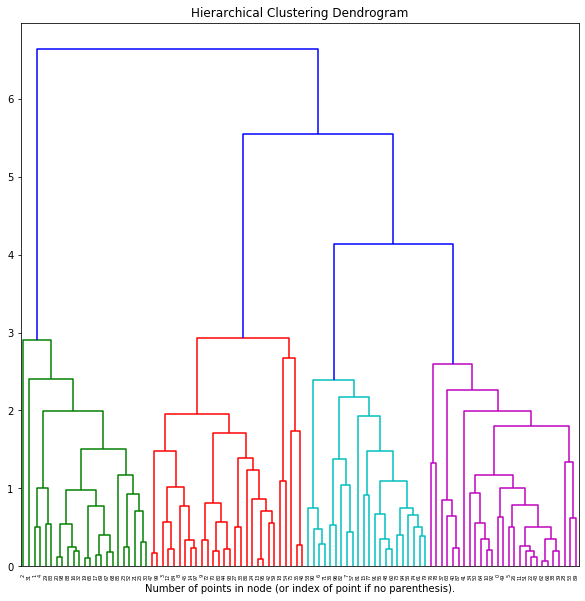

In [23]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, color_threshold=3.5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

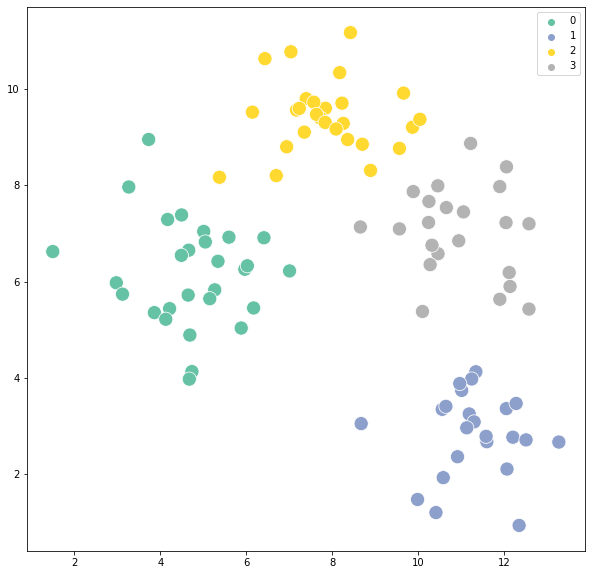

In [24]:
model = AgglomerativeClustering(n_clusters=4, linkage="average", affinity='euclidean')
cluster = model.fit_predict(X)
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster,  s=200, palette='Set2')

In [25]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single", affinity='euclidean')
model = model.fit(X)

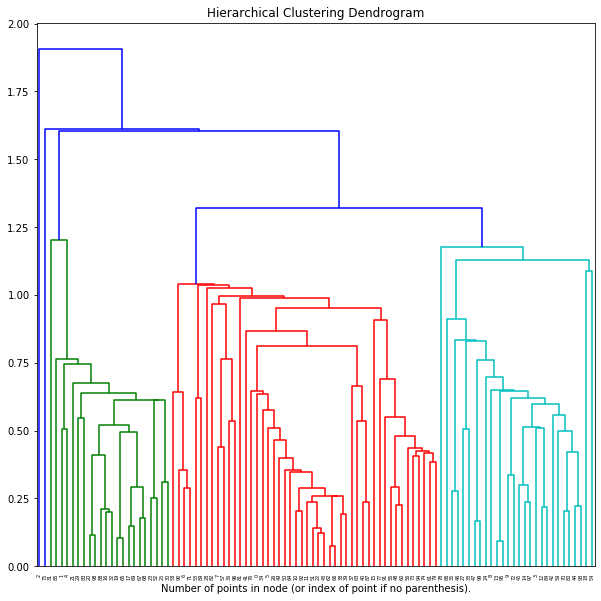

In [26]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, color_threshold=1.3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

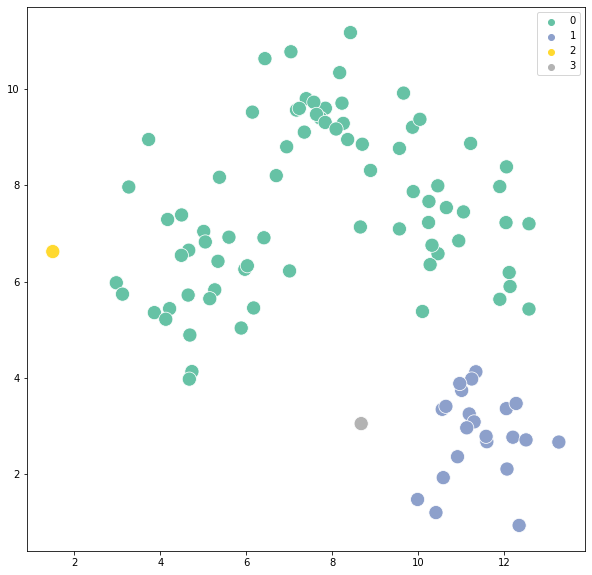

In [27]:
model = AgglomerativeClustering(n_clusters=4, linkage="single", affinity='euclidean')
cluster = model.fit_predict(X)
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster,  s=200, palette='Set2')